# Convnet Visualization
- Convnet은 시각적인 개념을 학습한 것

## 컨브넷 중간층의 출력을 시각화
- Visualizing Intermediate activations

In [8]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
!unzip cats_and_dogs_small.zip    > /dev/null

In [17]:
img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image 
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


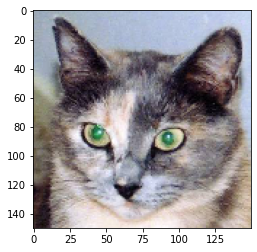

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [19]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [20]:
activations = activation_model.predict(img_tensor)


first_layer_activation = activations[0]
print (first_layer_activation.shape)

(1, 148, 148, 32)


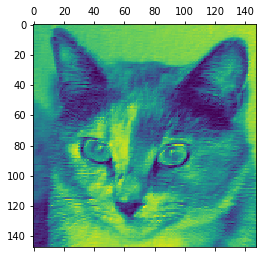

In [21]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

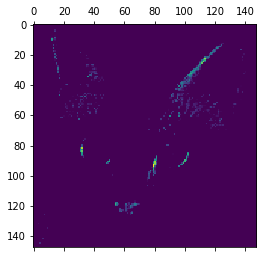

In [22]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

In [26]:
# 첫번째 층은 여러 종류의 에지 감지기를 모아놓은 것과 같음 → 초기 사진에 있는 거의 모든 정보가 유지됨
# 상위층으로 갈수록 활성화는 점점 더 추상적 → 시각적으로 이해하기 어려워짐
# 상위층의 표현은 이미지의 시각적 콘텐츠에 대한 정보가 점점 감소하고 이미지의 클래스에 관한 정보가 점점 증가
# 상위층으로 갈수록 비어있는 활성화가 늘어남 → 층을 올라갈수록 활성화되지 않는 필터들이 생기기 시작(필터에 인코딩 된 패턴이 입력 이미지에 없다는 의미)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


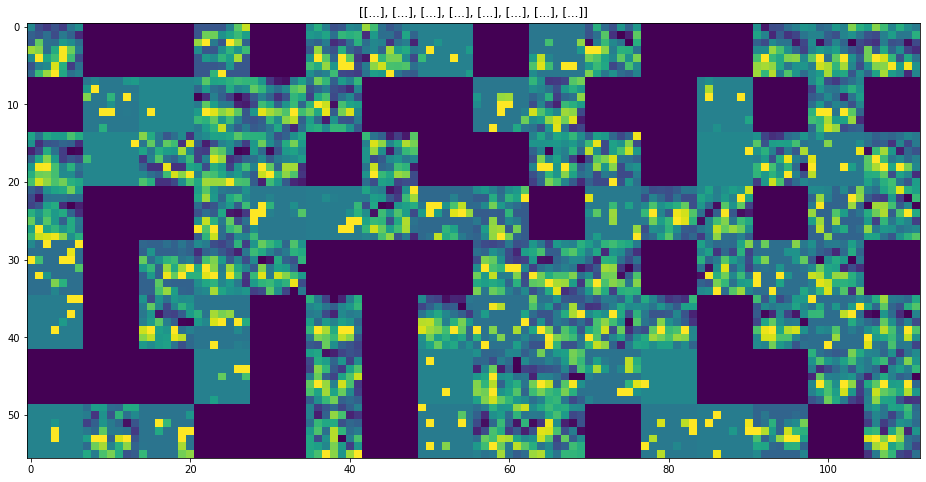

In [25]:
# 중간층의 모든 활성화 채널 시각화

layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer_names)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')